In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [19]:
img = image.load_img("faceshape/training_set/Heart/heart (1).jpg")

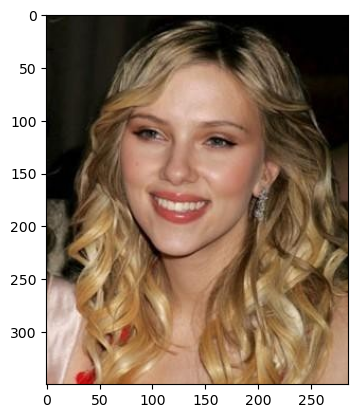

In [20]:
plt.imshow(img)

In [21]:
cv2.imread("faceshape/training_set/Heart/heart (1).jpg")

array([[[ 20,  28,  28],
        [ 16,  24,  24],
        [ 12,  20,  20],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 21,  29,  29],
        [ 17,  25,  25],
        [ 12,  20,  20],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 14,  22,  22],
        [ 12,  20,  20],
        [ 10,  18,  18],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[127, 141, 189],
        [129, 143, 191],
        [131, 145, 193],
        ...,
        [132, 157, 191],
        [131, 156, 190],
        [131, 156, 190]],

       [[125, 139, 187],
        [128, 142, 190],
        [130, 146, 193],
        ...,
        [132, 157, 191],
        [131, 156, 190],
        [130, 155, 189]],

       [[124, 138, 187],
        [126, 140, 189],
        [128, 143, 192],
        ...,
        [132, 157, 191],
        [131, 156, 190],
        [130, 155, 189]]

In [22]:
cv2.imread("faceshape/training_set/Heart/heart (1).jpg").shape

(350, 286, 3)

In [23]:
train = ImageDataGenerator(rescale=1.0/255) 
validation = ImageDataGenerator(rescale=1.0/255) 

In [24]:
train_dataset = train.flow_from_directory('faceshape/training_set/',
                                         target_size = (200, 200),
                                         batch_size =32,
                                         class_mode = 'categorical')

validation_dataset = validation.flow_from_directory('faceshape/validation_set/',
                                         target_size = (200, 200),
                                         batch_size =32,
                                         class_mode = 'categorical')

Found 4000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [25]:
train_dataset.class_indices

{'Heart': 0, 'Oblong': 1, 'Oval': 2, 'Round': 3, 'Square': 4}

In [26]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4])

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(5, activation='softmax')
])

In [33]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [34]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validation_dataset)

Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 1.6908 - accuracy: 0.1250 - val_loss: 1.6105 - val_accuracy: 0.2000
Epoch 2/10


UnknownError: Graph execution error:

OSError: image file is truncated (0 bytes not processed)
Traceback (most recent call last):

  File "C:\Users\ayuad\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "C:\Users\ayuad\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\ayuad\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\ayuad\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\ayuad\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\data_adapter.py", line 1050, in generator_fn
    yield x[i]

  File "C:\Users\ayuad\anaconda3\envs\tensorflow\lib\site-packages\keras\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\ayuad\anaconda3\envs\tensorflow\lib\site-packages\keras\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "C:\Users\ayuad\anaconda3\envs\tensorflow\lib\site-packages\keras\utils\image_utils.py", line 480, in load_img
    img = img.resize(width_height_tuple, resample)

  File "C:\Users\ayuad\anaconda3\envs\tensorflow\lib\site-packages\PIL\Image.py", line 2157, in resize
    self.load()

  File "C:\Users\ayuad\anaconda3\envs\tensorflow\lib\site-packages\PIL\ImageFile.py", line 266, in load
    raise OSError(msg)

OSError: image file is truncated (0 bytes not processed)


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_4504]